# TP 2 ALC 

## Integrantes:
- A
- B

## Dependencias

Tabla nutricional input POR DIA

Esto es lo que tenemos que calñcular con la funcion del Ejercicio 2

In [1]:
# Instalacion de paquetes faltantes
#!pip install scipy
#!pip install pandas --upgrade
#!pip install seaborn --upgrade
#!pip install scikit-learn
#!pip install matplotlib --upgrade

In [2]:
from funciones import *

### Consigna 1

Esta funcion devuelve la tabla nutricional con 0 completados, renombramiento y recalculo de Na, Ca y Fe. Faltaria normalizar las columnas de alimentos

In [3]:
tabla_nutricional().head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Verdura/Fruta
0,LECHE FLUIDA ENTERA,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0,0
1,LECHE ENTERA EN POLVO,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0,0
2,YOGURT,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0,0
3,QUESO CREMA,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0,0
4,QUESO CUARTIROLO,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0,0


### Consigna 2

El ejercicio da Falso ya que falta hacer arreglo donde la cantidad maxima de nutrientes es la suma de nutrientes, no de la cantidad del alimento

In [4]:
chequeoDieta(tabla_nutricional())

HC
419.8623726 410.2349999999999 572.539599
False

Proteina
76.3386132 112.41299999999997 114.5079198

Grasas
114.5079198 76.911 229.0158396
False

Sodio
3.337714  >  0.2

Fibra
21.26  >  25
False

Fruta y Verduras
650.0 >= 400


False

### Consigna 3

Primero preparamos la tabla nutricional para un gramo de cada alimento (Aca tambien tenemos que hacer la cantidad de un gramo es de la cantidad o de la suma de nutrientes????)

In [5]:
tabla_nutricional = tabla_nutricional()

tabla_limpia = tabla_nutricional.drop(columns=["Alimento", "Cantidad (gr/ml)", "Verdura/Fruta"])

tabla_divida = pd.DataFrame()

for i in range(0, len(tabla_nutricional)):
    tabla_divida = tabla_divida._append(tabla_limpia.iloc[i]/tabla_nutricional["Cantidad (gr/ml)"].iloc[i])

tabla_divida.head()


,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,0.046000,0.031000,0.029000,0.000570,0.001050,7.000000e-07,0.0,0.018481,0.008111,0.001926,0.0
1,0.410000,0.258182,0.248182,0.004040,0.009000,5.454545e-06,0.0,0.147273,0.070000,0.005455,0.0
2,0.128947,0.026842,0.025789,0.000421,0.000930,2.631579e-07,0.0,0.016842,0.007368,0.000737,0.0
3,0.036145,0.060241,0.222892,0.000741,0.000560,0.000000e+00,0.0,0.216867,0.066265,0.006024,0.0
4,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000e+00,0.0,0.207650,0.057377,0.005464,0.0


Calculamos la matriz con escalado estandar (Tabla Estrella)

In [6]:
tabla_estrella = tabla_divida - tabla_divida.mean()

tabla_estrella.head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,-0.141722,-0.041134,-0.073702,-0.012232,0.000359,-0.000011,-0.07063,-0.023724,-0.022930,-0.029649,-0.007621
1,0.222278,0.186048,0.145479,-0.008762,0.008309,-0.000006,-0.07063,0.105067,0.038959,-0.026120,-0.007621
2,-0.058775,-0.045292,-0.076913,-0.012382,0.000239,-0.000011,-0.07063,-0.025364,-0.023672,-0.030838,-0.007621
3,-0.151577,-0.011893,0.120189,-0.012061,-0.000130,-0.000011,-0.07063,0.174662,0.035224,-0.025550,-0.007621
4,-0.171329,0.138249,0.115877,-0.007108,0.003829,-0.000011,-0.07063,0.165444,0.026336,-0.026110,-0.007621


Con esto podemos cacular la matriz de covarianza

In [7]:
covarianza = (tabla_estrella.transpose() @ tabla_estrella)/len(tabla_estrella)

covarianza

,HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
HC (gr),7.712939e-02,-2.807587e-04,-1.211085e-02,-1.551012e-03,1.181821e-05,6.001139e-07,4.044257e-02,-4.924729e-03,-3.097968e-03,-5.099179e-03,1.104142e-03
Proteinas (gr),-2.807587e-04,7.422239e-03,1.998140e-04,-6.388112e-07,7.958394e-05,6.568193e-07,-3.155509e-03,1.821622e-03,5.953635e-04,-1.759198e-03,-1.890942e-04
Grasas (gr),-1.211085e-02,1.998140e-04,4.862791e-02,-6.858051e-04,7.066464e-05,-5.252520e-07,-5.215232e-03,1.349103e-02,1.212881e-02,2.205015e-02,-6.869077e-04
Na (gr),-1.551012e-03,-6.388112e-07,-6.858051e-04,3.665155e-03,-2.762780e-06,-4.505414e-08,-8.487049e-04,-3.080117e-04,-2.502751e-04,-2.386549e-04,-9.353908e-05
Ca (gr),1.181821e-05,7.958394e-05,7.066464e-05,-2.762780e-06,3.147284e-06,-4.327654e-09,-5.708222e-06,6.696622e-05,1.839944e-05,-1.352182e-05,-3.153673e-06
Fe (gr),6.001139e-07,6.568193e-07,-5.252520e-07,-4.505414e-08,-4.327654e-09,2.554781e-10,-3.713413e-07,-1.961262e-07,-5.558786e-08,-2.440272e-07,1.670945e-08
Azucares Libres (gr),4.044257e-02,-3.155509e-03,-5.215232e-03,-8.487049e-04,-5.708222e-06,-3.713413e-07,4.840577e-02,-2.158981e-03,-1.280549e-03,-2.106708e-03,-3.286463e-04
AGS (gr),-4.924729e-03,1.821622e-03,1.349103e-02,-3.080117e-04,6.696622e-05,-1.961262e-07,-2.158981e-03,7.186318e-03,3.924956e-03,2.655723e-03,-3.024027e-04
AGNI (gr),-3.097968e-03,5.953635e-04,1.212881e-02,-2.502751e-04,1.839944e-05,-5.558786e-08,-1.280549e-03,3.924956e-03,3.559516e-03,4.678748e-03,-1.962697e-04
AG p (gr),-5.099179e-03,-1.759198e-03,2.205015e-02,-2.386549e-04,-1.352182e-05,-2.440272e-07,-2.106708e-03,2.655723e-03,4.678748e-03,1.419118e-02,-2.187988e-04


Calculamos los autovectores y autovalores de la matriz de Covarianza

In [8]:
gamma, U = np.linalg.eigh(covarianza)
U = np.flip(U, 1)

"""
print("Autovalores: ", gamma)

for i in range(0, len(U)):
    print("Autovector ", i, ": ", U[:,i])
"""

'\nprint("Autovalores: ", gamma)\n\nfor i in range(0, len(U)):\n    print("Autovector ", i, ": ", U[:,i])\n'

Veamos la variabilidad de cada autovector

In [9]:
for i in range(0, len(gamma)):
    print("Variabilidad de Autovector", i, ": ", 100*gamma[i]/sum(gamma), "%")

Variabilidad de Autovector 0 :  6.07736360923675e-08 %
Variabilidad de Autovector 1 :  0.0008009627523308011 %
Variabilidad de Autovector 2 :  0.023295414608125217 %
Variabilidad de Autovector 3 :  0.07822140829391903 %
Variabilidad de Autovector 4 :  0.23227438309952084 %
Variabilidad de Autovector 5 :  1.7089349426558174 %
Variabilidad de Autovector 6 :  2.1719890366249643 %
Variabilidad de Autovector 7 :  4.62447266261795 %
Variabilidad de Autovector 8 :  9.556302683201652 %
Variabilidad de Autovector 9 :  28.879717881942785 %
Variabilidad de Autovector 10 :  52.723990563429304 %


Esto nos dice que ya con los ultimos 3 autovectores vamos a tener una precision del casi 95% de los datos. Asi que calculamos nuestra nueva tabla con estos 3 autovectores

In [10]:
autovectores = U[:,len(U)-3:len(U)]

tabla_final =  tabla_estrella @ autovectores

tabla_final = tabla_final.rename(columns={0:"Z1", 1:"Z2", 2:"Z3"})

tabla_final["Alimento"] = tabla_nutricional["Alimento"]

tabla_final.head()

,Z1,Z2,Z3,Alimento
0,0.008446,-0.000939,0.000002,LECHE FLUIDA ENTERA
1,0.008418,-0.005447,-0.000004,LECHE ENTERA EN POLVO
2,0.011246,-0.000867,0.000004,YOGURT
3,0.003557,0.001559,0.000004,QUESO CREMA
4,-0.002795,-0.000823,0.000007,QUESO CUARTIROLO


Veamos los graficos de cada uno de las convinaciones de columnas para sacar conclusiones

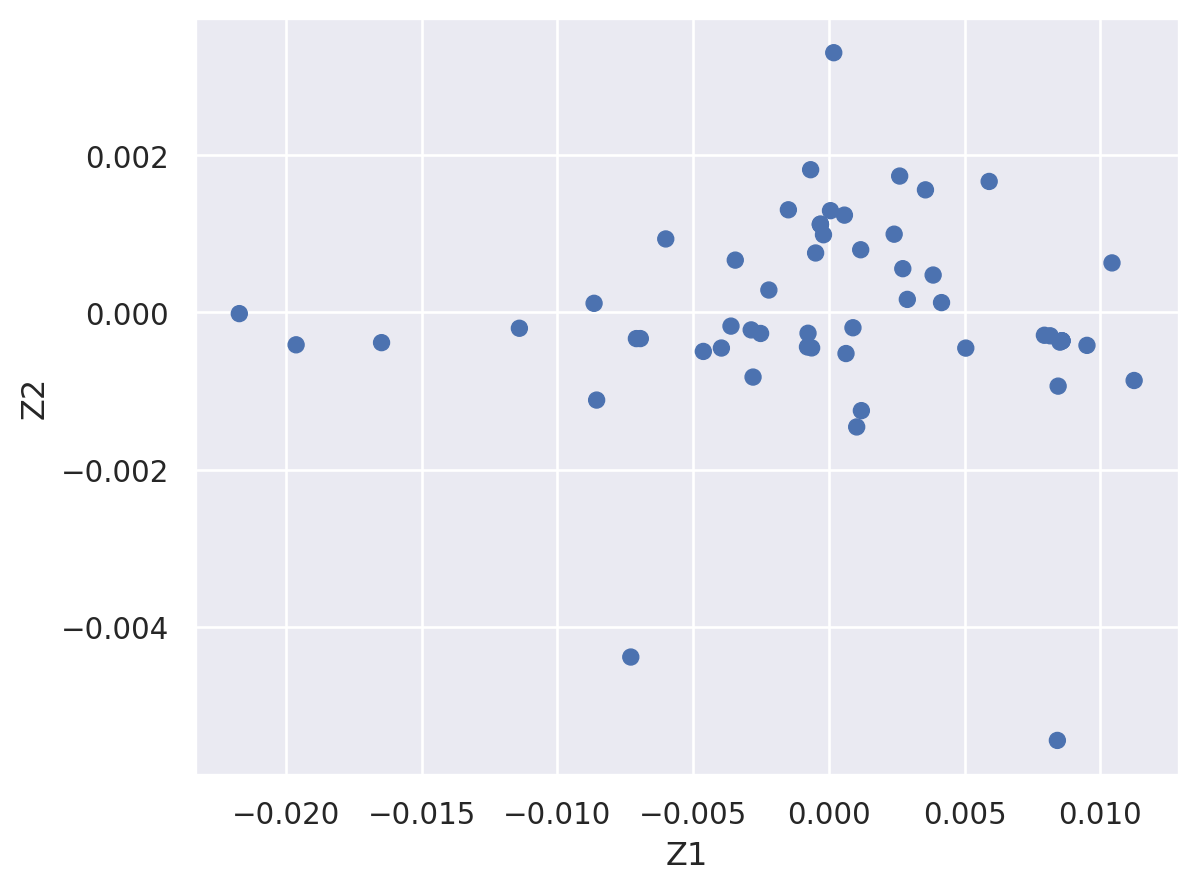

In [11]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z2")
)

In [12]:
tabla_final[tabla_final["Z1"]<-0.02]

,Z1,Z2,Z3,Alimento
47,-0.021723,-0.000016,-0.000002,ARVEJAS EN LATA


In [13]:
tabla_final[tabla_final["Z1"]>0.01]

,Z1,Z2,Z3,Alimento
2,0.011246,-0.000867,0.000004,YOGURT
29,0.010430,0.000629,-0.000002,HARINA MAIZ


In [14]:
tabla_final[tabla_final["Z2"]<-0.0015]

,Z1,Z2,Z3,Alimento
1,0.008418,-0.005447,-0.000004,LECHE ENTERA EN POLVO
5,-0.007299,-0.004386,0.000002,QUESO RALLAR


In [15]:
tabla_final[tabla_final["Z2"]>0.002]

,Z1,Z2,Z3,Alimento
37,0.000179,0.003305,0.000017,MORTADELA


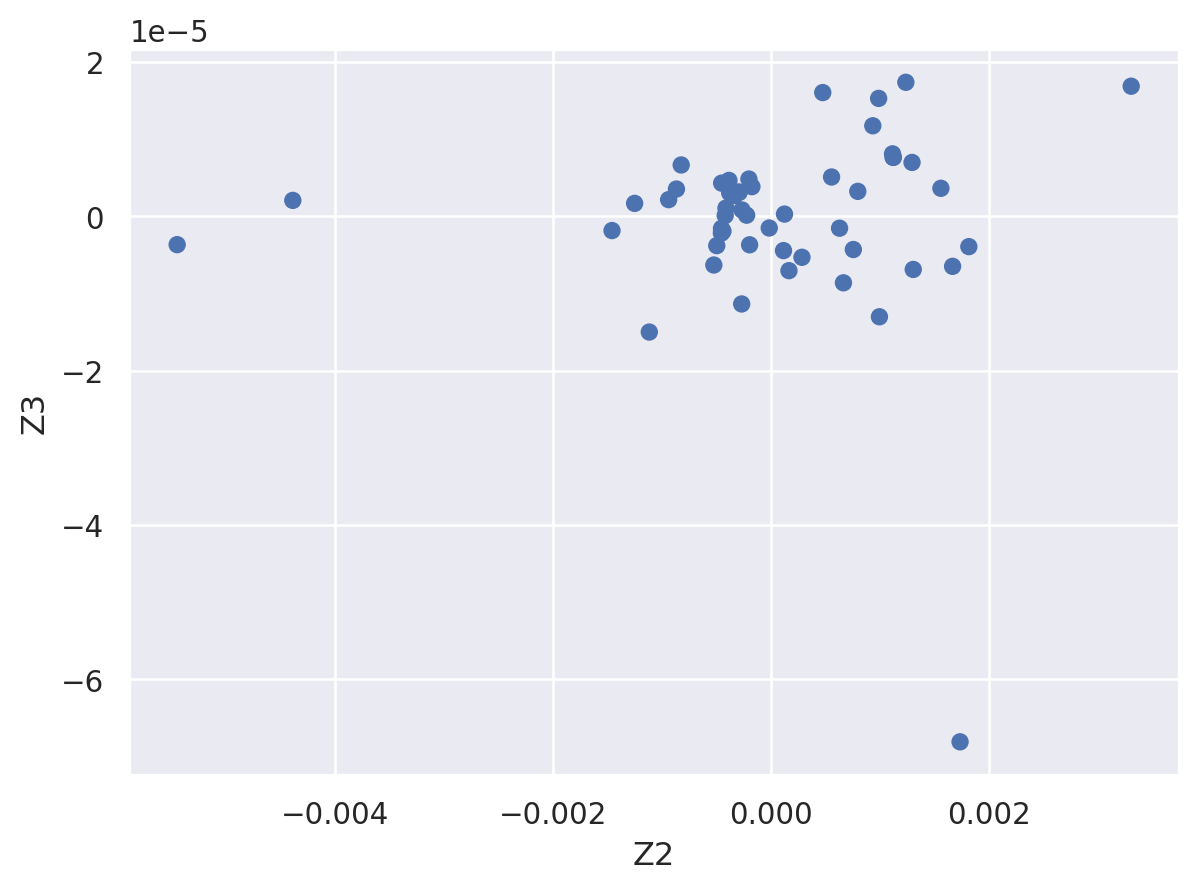

In [16]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z2", y="Z3")
)

In [17]:
tabla_final[tabla_final["Z3"] < -0.0001]

,Z1,Z2,Z3,Alimento


In [18]:
tabla_final[tabla_final["Z3"] > 0.000055]

,Z1,Z2,Z3,Alimento


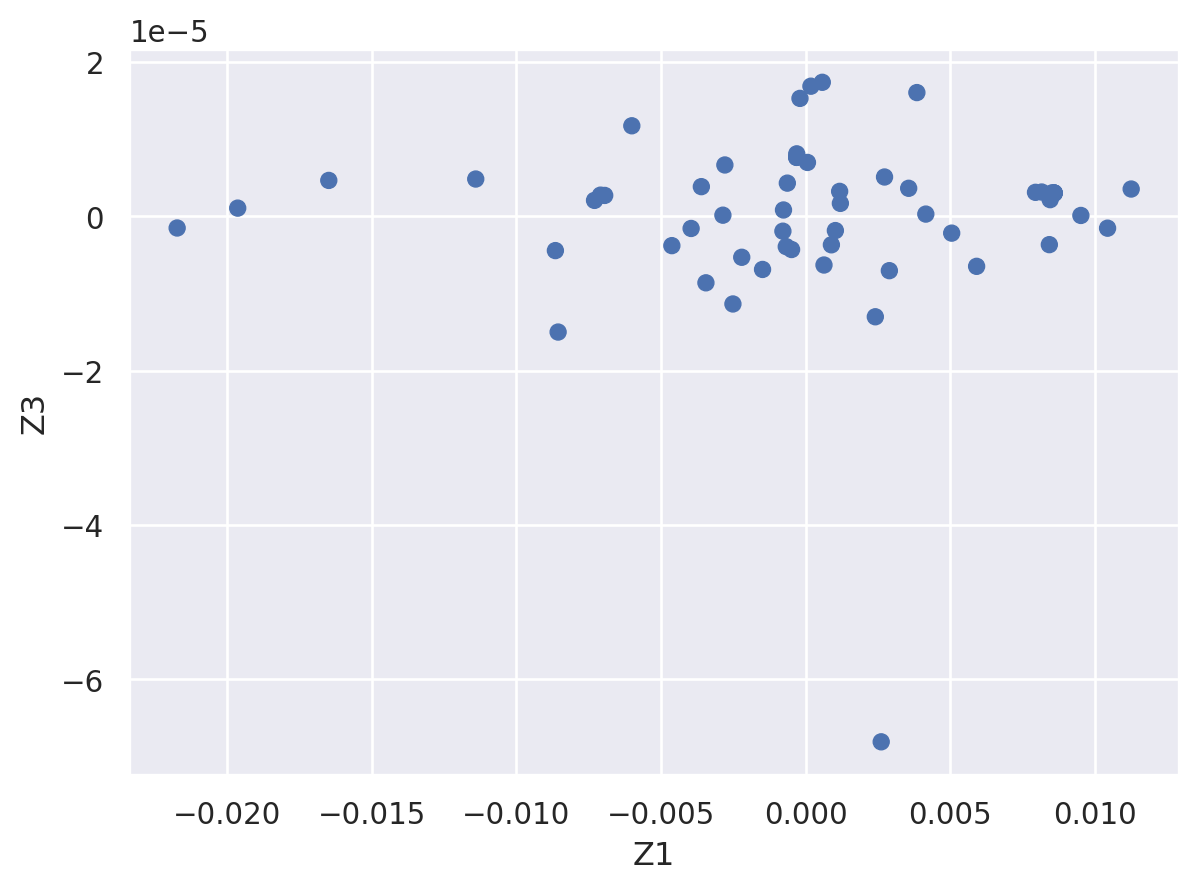

In [19]:
(
so.Plot()
.add(so.Dot(), data=tabla_final, x="Z1", y="Z3")
)

Tambien hicimos un grafico en 3D para ver la relacion de estas 3 columnas juntas

<Axes3DSubplot: >

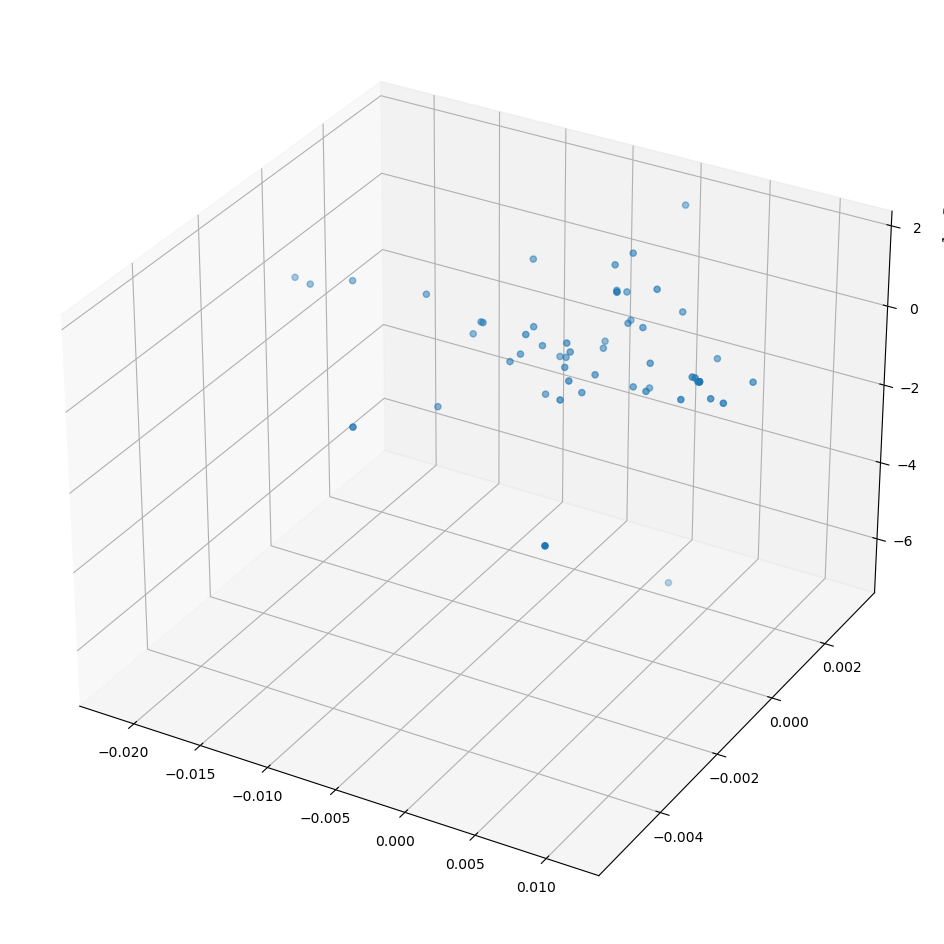

In [20]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(tabla_final["Z1"],tabla_final["Z2"],tabla_final["Z3"])

ax

### Consigna 4

Si mi ACP viene de un espacio de 11, como quieren que arregle a 5?

Seguro que hay que cambiarle la base para poder hacer el cambio (De R11 a R5)

Vamos a pedir nuestras tablas 

In [21]:
consumidores = tabla_consumidores()

consumidores


,PRODUCTOS,Cantidad (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,HUEVOS COLOR DOCENA,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,PAN FRESCO,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,LECHE C/VIT.FORT,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,YERBA TARAGUI,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,ZANAHORIAS,1000,820.0,990.0,1100.0,1100.0,1100.0


In [22]:
consumidores_clean = consumidores.drop(columns=["PRODUCTOS", "Cantidad (gr)"])

consumidores_clean

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,2500.0,3100.0,3450.0,3600.0,3700.0
1,1650.0,2300.0,2800.0,3100.0,3550.0
2,1990.0,2050.0,2050.0,2100.0,2100.0
3,1600.0,1990.0,2150.0,2200.0,2290.0
4,950.0,1250.0,1350.0,1500.0,1690.0
5,2200.0,2600.0,3000.0,3400.0,3800.0
6,1650.0,2100.0,2200.0,2300.0,2300.0
7,1100.0,1210.0,1620.0,1890.0,1990.0
8,2800.0,3700.0,4600.0,4950.0,5500.0
9,820.0,990.0,1100.0,1100.0,1100.0


In [23]:
consumidores_gramo = pd.DataFrame()

for i in range(0, len(consumidores_clean)):
    consumidores_gramo = consumidores_gramo._append(consumidores_clean.iloc[i].div(consumidores["Cantidad (gr)"].iloc[i]), ignore_index = True)

consumidores_gramo["Alimento"] = consumidores["PRODUCTOS"]

consumidores_gramo.applymap(arreglo_observacional)

consumidores_gramo

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Alimento
0,1.666667,2.066667,2.300000,2.400000,2.466667,ACEITE COCINERO GIRASOL
1,1.650000,2.300000,2.800000,3.100000,3.550000,ARROZ GRANO FINO
2,1.990000,2.050000,2.050000,2.100000,2.100000,AZUCAR LEDESMA
3,3.200000,3.980000,4.300000,4.400000,4.580000,FIDEOS GUISEROS
4,0.950000,1.250000,1.350000,1.500000,1.690000,HARINA DE TRIGO
5,3.055556,3.611111,4.166667,4.722222,5.277778,HUEVOS COLOR DOCENA
6,1.650000,2.100000,2.200000,2.300000,2.300000,PAN FRESCO
7,1.100000,1.210000,1.620000,1.890000,1.990000,LECHE C/VIT.FORT
8,2.800000,3.700000,4.600000,4.950000,5.500000,YERBA TARAGUI
9,0.820000,0.990000,1.100000,1.100000,1.100000,ZANAHORIAS


Con esto tengo cada columna, ahora me faltaria proyectar cada una en el espacio de los ACP para conseguir el precio de cada epoca de su nutriente. 

In [24]:
tabla_final = tabla_final.applymap(arreglo_observacional)

tabla_mergeada = pd.merge(tabla_final, consumidores_gramo, on="Alimento")

tabla_mergeada



,Z1,Z2,Z3,Alimento,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,0.000059,0.001294,6.983863e-06,ASADO,5.40,6.30,7.50,7.60,7.75
1,0.000630,-0.000524,-6.312791e-06,ASADO,5.40,6.30,7.50,7.60,7.75
2,-0.000314,0.001122,7.639527e-06,PALETA,5.20,6.20,7.10,7.80,7.90
3,-0.000490,0.000756,-4.303900e-06,BOLA DE LOMO,6.20,7.20,8.30,8.50,8.65
4,-0.003962,-0.000454,-1.575465e-06,CEBOLLA,0.50,0.70,0.99,1.15,1.50
5,-0.000769,-0.000266,8.222848e-07,MANZANA,1.90,2.10,2.40,2.40,2.70
6,-0.006948,-0.000334,2.707581e-06,NARANJA,0.92,1.25,1.85,1.90,2.20
7,-0.006011,0.000934,1.173614e-05,HARINA DE TRIGO,0.95,1.25,1.35,1.50,1.69


### Consigna 5

Decidimos usar la leche nio en polvo
Tomate Perrita 
Paleta No cocida(Mas nutrientes)

In [25]:
tabla_nutricional_filtrada = pd.DataFrame()

tabla_nutricional_filtrada["Alimento"] = tabla_nutricional["Alimento"]


tabla_nutricional_filtrada[["HC (gr)","Proteinas (gr)","Grasas (gr)"]] = tabla_divida[["HC (gr)","Proteinas (gr)","Grasas (gr)"]]

#Dropeo de filas no buscadas
tabla_nutricional_filtrada = tabla_nutricional_filtrada[~tabla_nutricional_filtrada["Alimento"].isin(["TOMATE ENVASADO","LECHE ENTERA EN POLVO","PALETA COCIDA"])]

tabla_nutricional_filtrada['Alimento']=tabla_nutricional_filtrada['Alimento'].apply(arreglo_observacional)

tabla_nutricional_filtrada.head()

,Alimento,HC (gr),Proteinas (gr),Grasas (gr)
0,LECHE,0.046000,0.031000,0.029000
2,YOGURT,0.128947,0.026842,0.025789
3,QUESO CREMA,0.036145,0.060241,0.222892
4,QUESO CUARTIROLO,0.016393,0.210383,0.218579
5,QUESO RALLAR,0.036145,0.331325,0.271084


In [26]:
consumidores_gramo

consumidores_gramo["PRODUCTOS"] = consumidores['PRODUCTOS'].apply(arreglo_observacional)

consumidores_gramo = consumidores_gramo.rename(columns={"PRODUCTOS":"Alimento"})

consumidores_gramo.head()

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Alimento,Alimento
0,1.666667,2.066667,2.30,2.4,2.466667,ACEITE COCINERO GIRASOL,ACEITE
1,1.650000,2.300000,2.80,3.1,3.550000,ARROZ GRANO FINO,ARROZ
2,1.990000,2.050000,2.05,2.1,2.100000,AZUCAR LEDESMA,AZUCAR
3,3.200000,3.980000,4.30,4.4,4.580000,FIDEOS GUISEROS,FIDEOS
4,0.950000,1.250000,1.35,1.5,1.690000,HARINA DE TRIGO,HARINA DE TRIGO


In [27]:
consumidores_nutricional = pd.merge(tabla_nutricional_filtrada,consumidores_gramo, on='Alimento')

consumidores_nutricional

ValueError: The column label 'Alimento' is not unique.

In [ ]:
melted_nutricional = consumidores_nutricional.melt(id_vars=["Alimento","HC (gr)","Proteinas (gr)","Grasas (gr)"],var_name='Fecha',value_name='Precio por gr ($)')

melted_nutricional

,Alimento,HC (gr),Proteinas (gr),Grasas (gr),Fecha,Precio por gr ($)
0,LECHE,0.046000,0.031000,0.029000,31/12/2023,1.100000
1,HUEVO,0.000000,0.120000,0.118125,31/12/2023,3.055556
2,ASADO,0.000000,0.186000,0.150000,31/12/2023,5.400000
3,PALETA,0.000000,0.200000,0.100000,31/12/2023,5.200000
4,CARNE PICADA,0.000000,0.200000,0.100000,31/12/2023,4.200000
...,...,...,...,...,...,...
95,FIDEOS,0.725893,0.127679,0.015714,30/4/2024,4.580000
96,PAPA,0.176987,0.026987,0.000000,30/4/2024,0.900000
97,ACEITE,0.000000,0.000000,1.000000,30/4/2024,2.466667
98,AZUCAR,1.000000,0.000000,0.000000,30/4/2024,2.100000


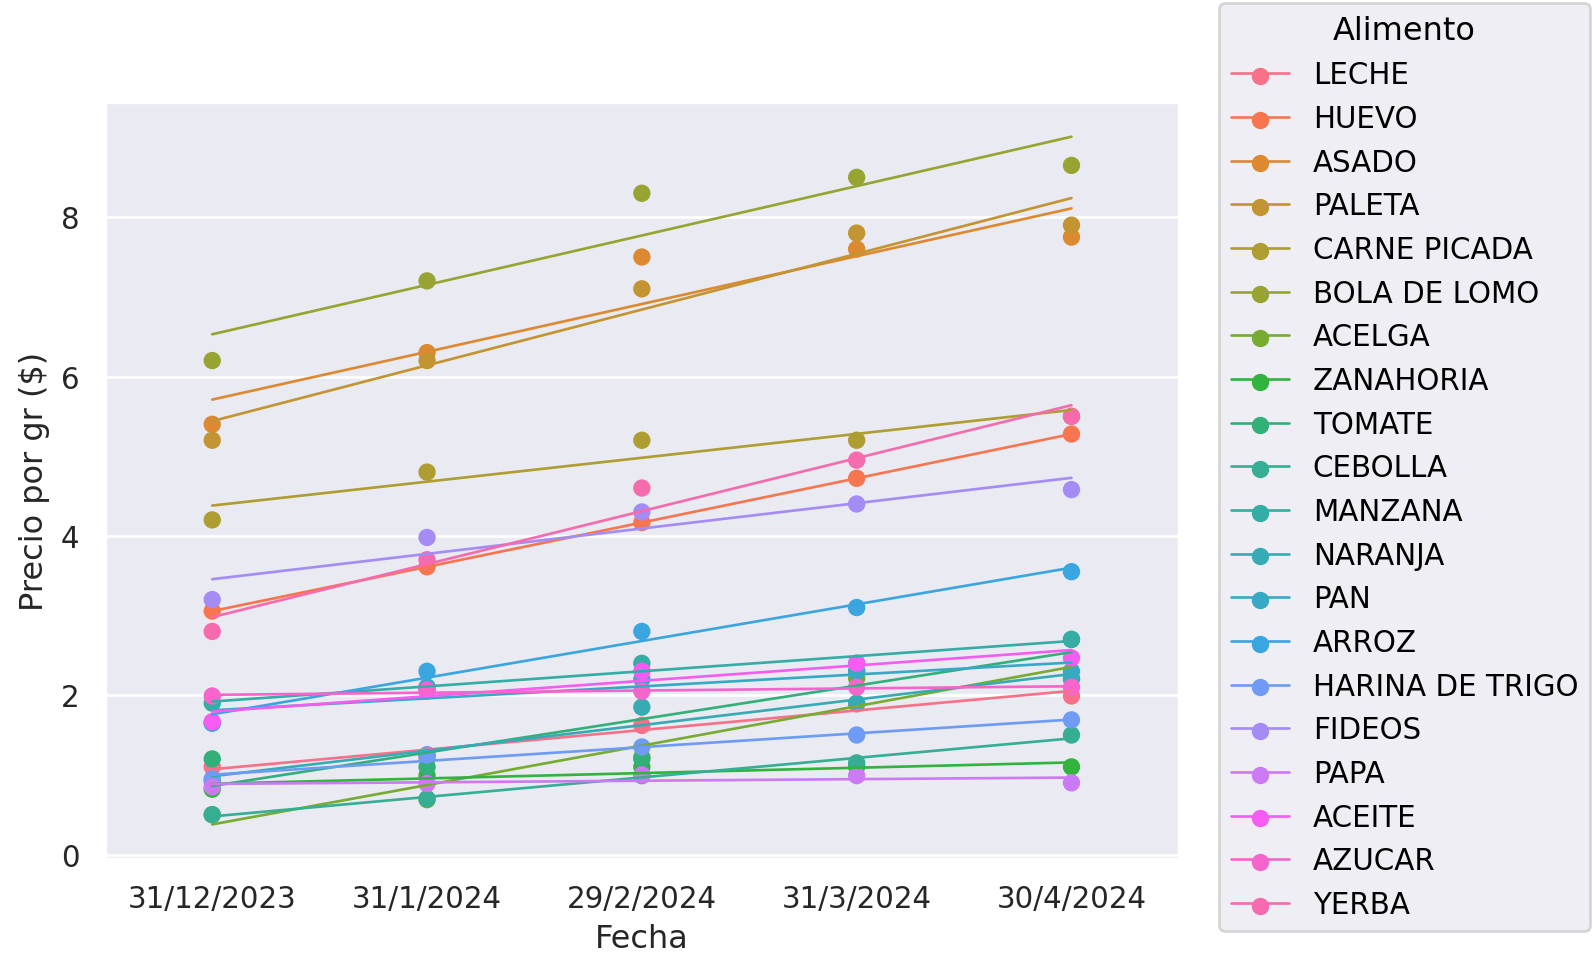

In [ ]:
so.Plot(data=melted_nutricional, x="Fecha", y="Precio por gr ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de Alimento

In [ ]:
HC__Nutricional = melted_nutricional[melted_nutricional["HC (gr)"] > 0].drop(columns=["Proteinas (gr)", "Grasas (gr)"]).reset_index(drop=True)

HC__Nutricional.head()

,Alimento,HC (gr),Fecha,Precio por gr ($)
0,LECHE,0.046000,31/12/2023,1.10
1,ZANAHORIA,0.080000,31/12/2023,0.82
2,TOMATE,0.041014,31/12/2023,1.20
3,CEBOLLA,0.022045,31/12/2023,0.50
4,MANZANA,0.149016,31/12/2023,1.90


In [ ]:
HC__Nutricional["Precio por gr ($)"] = HC__Nutricional["Precio por gr ($)"] / HC__Nutricional["HC (gr)"]

HC__Nutricional = HC__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de HC ($)"})

HC__Nutricional.head()

,Alimento,HC (gr),Fecha,Precio por gr de HC ($)
0,LECHE,0.046000,31/12/2023,23.913043
1,ZANAHORIA,0.080000,31/12/2023,10.250000
2,TOMATE,0.041014,31/12/2023,29.257951
3,CEBOLLA,0.022045,31/12/2023,22.680412
4,MANZANA,0.149016,31/12/2023,12.750275


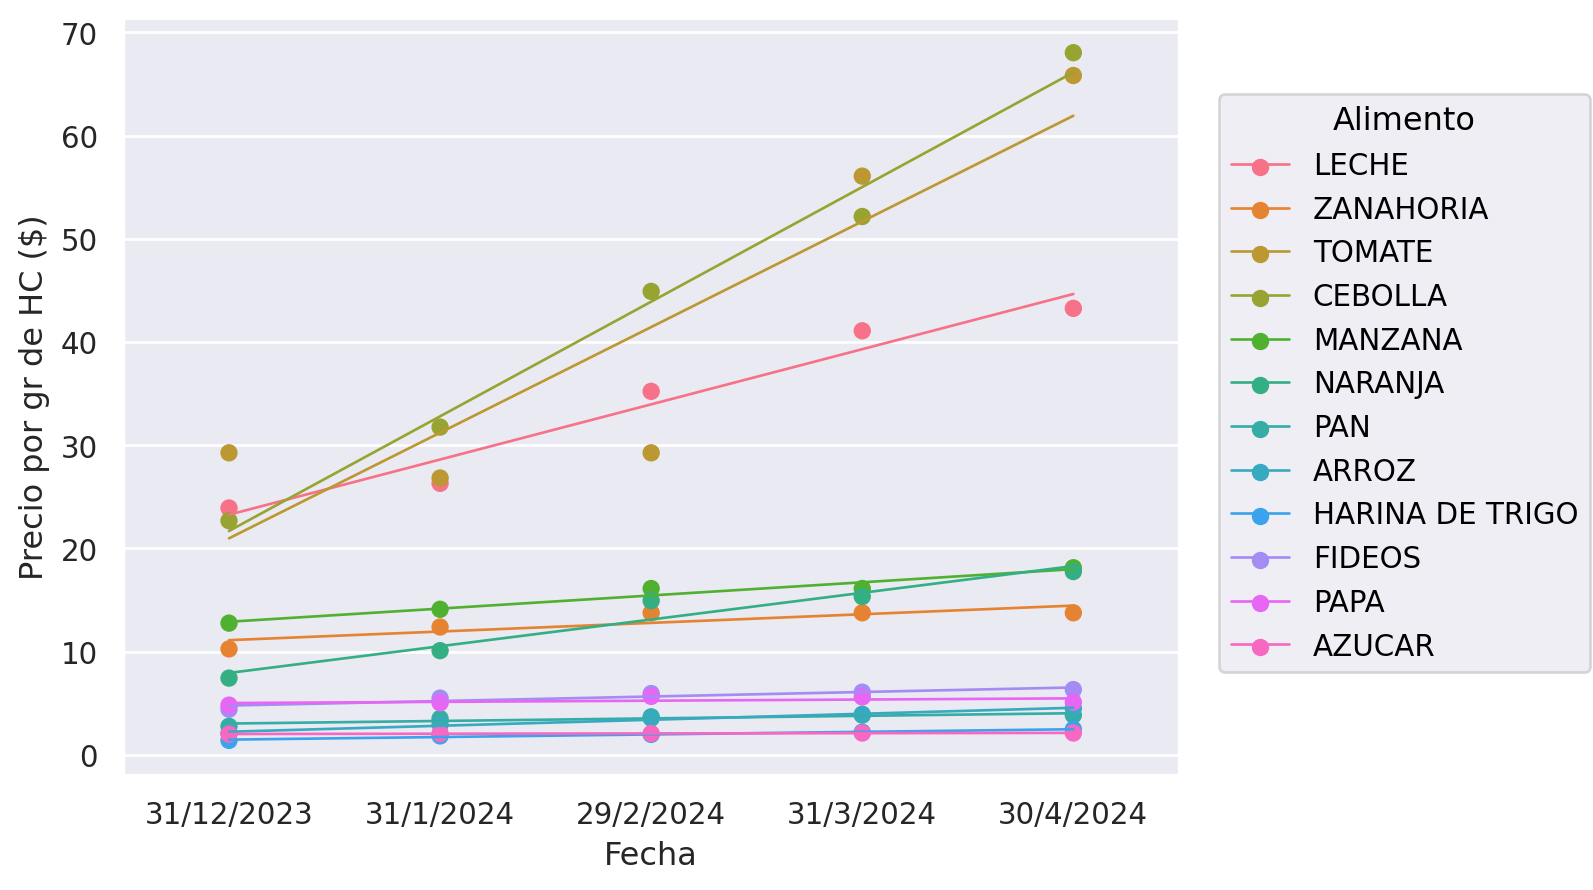

In [ ]:
so.Plot(data=HC__Nutricional, x="Fecha", y="Precio por gr de HC ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de HC

In [ ]:
Pr__Nutricional = melted_nutricional[melted_nutricional["Proteinas (gr)"] > 0].drop(columns=["HC (gr)", "Grasas (gr)"]).reset_index(drop=True)

Pr__Nutricional.head()

,Alimento,Proteinas (gr),Fecha,Precio por gr ($)
0,LECHE,0.031,31/12/2023,1.100000
1,HUEVO,0.120,31/12/2023,3.055556
2,ASADO,0.186,31/12/2023,5.400000
3,PALETA,0.200,31/12/2023,5.200000
4,CARNE PICADA,0.200,31/12/2023,4.200000


In [ ]:
Pr__Nutricional["Precio por gr ($)"] = Pr__Nutricional["Precio por gr ($)"] / Pr__Nutricional["Proteinas (gr)"]

Pr__Nutricional = Pr__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de Proteinas ($)"})

Pr__Nutricional.head()

,Alimento,Proteinas (gr),Fecha,Precio por gr de Proteinas ($)
0,LECHE,0.031,31/12/2023,35.483871
1,HUEVO,0.120,31/12/2023,25.462963
2,ASADO,0.186,31/12/2023,29.032258
3,PALETA,0.200,31/12/2023,26.000000
4,CARNE PICADA,0.200,31/12/2023,21.000000


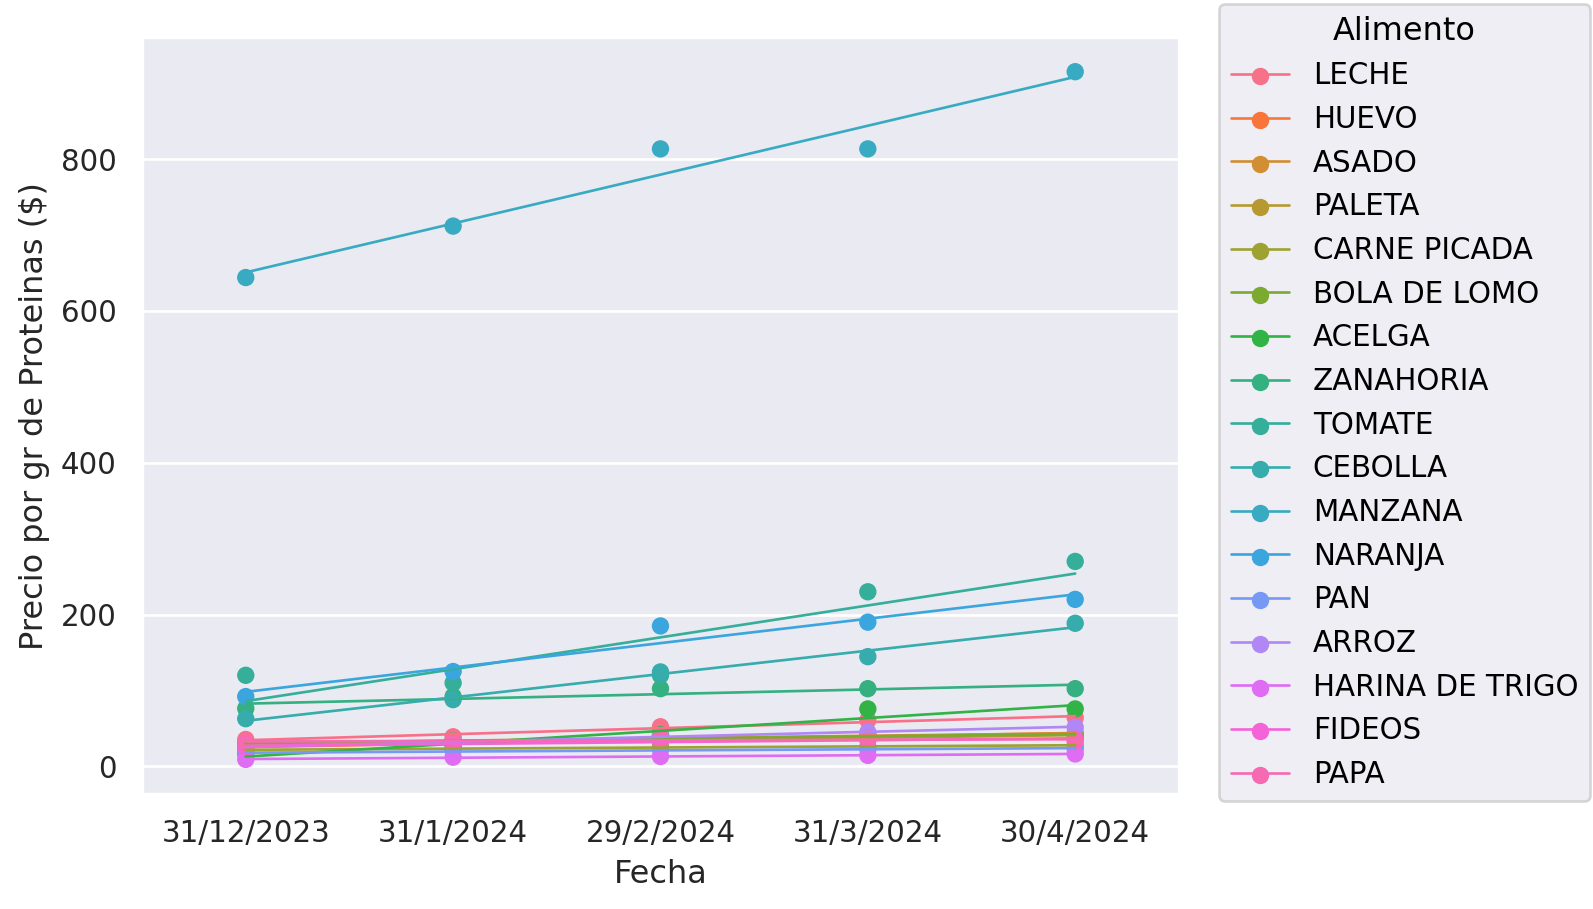

In [ ]:
so.Plot(data=Pr__Nutricional, x="Fecha", y="Precio por gr de Proteinas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Sin la Manzana

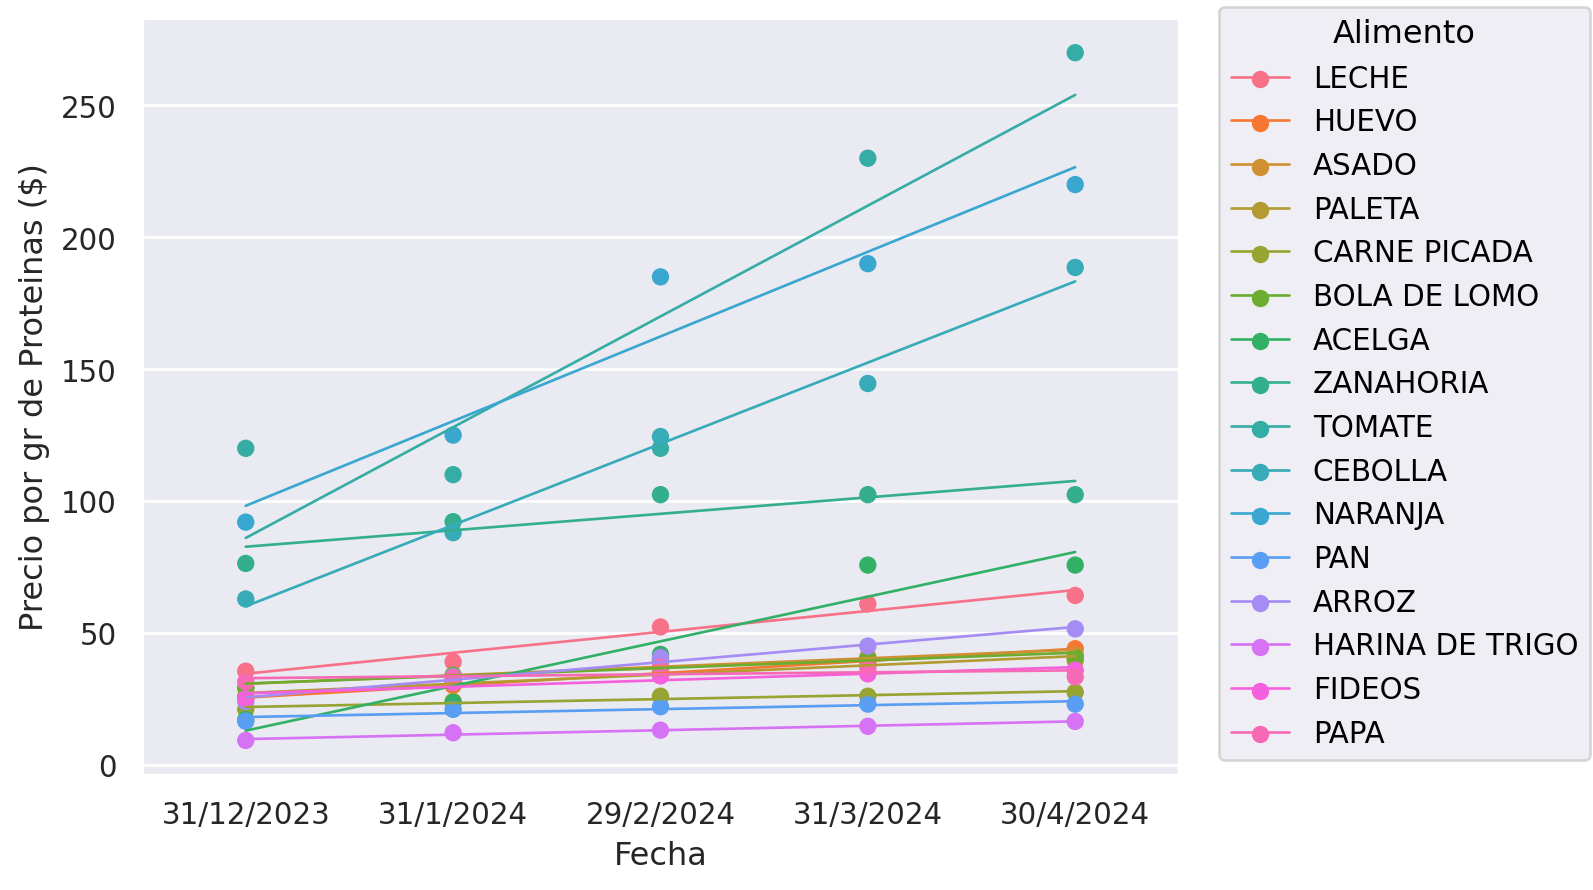

In [ ]:
so.Plot(data=Pr__Nutricional[Pr__Nutricional["Precio por gr de Proteinas ($)"] < 400], x="Fecha", y="Precio por gr de Proteinas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

Precio por Gramo de Proteina

In [ ]:
Gr__Nutricional = melted_nutricional[melted_nutricional["Grasas (gr)"] > 0].drop(columns=["HC (gr)", "Proteinas (gr)"]).reset_index(drop=True)

Gr__Nutricional.head()

,Alimento,Grasas (gr),Fecha,Precio por gr ($)
0,LECHE,0.029000,31/12/2023,1.100000
1,HUEVO,0.118125,31/12/2023,3.055556
2,ASADO,0.150000,31/12/2023,5.400000
3,PALETA,0.100000,31/12/2023,5.200000
4,CARNE PICADA,0.100000,31/12/2023,4.200000


In [ ]:
Gr__Nutricional["Precio por gr ($)"] = Gr__Nutricional["Precio por gr ($)"] / Gr__Nutricional["Grasas (gr)"]

Gr__Nutricional = Gr__Nutricional.rename(columns={"Precio por gr ($)":"Precio por gr de Grasas ($)"})

Gr__Nutricional.head()

,Alimento,Grasas (gr),Fecha,Precio por gr de Grasas ($)
0,LECHE,0.029000,31/12/2023,37.931034
1,HUEVO,0.118125,31/12/2023,25.867137
2,ASADO,0.150000,31/12/2023,36.000000
3,PALETA,0.100000,31/12/2023,52.000000
4,CARNE PICADA,0.100000,31/12/2023,42.000000


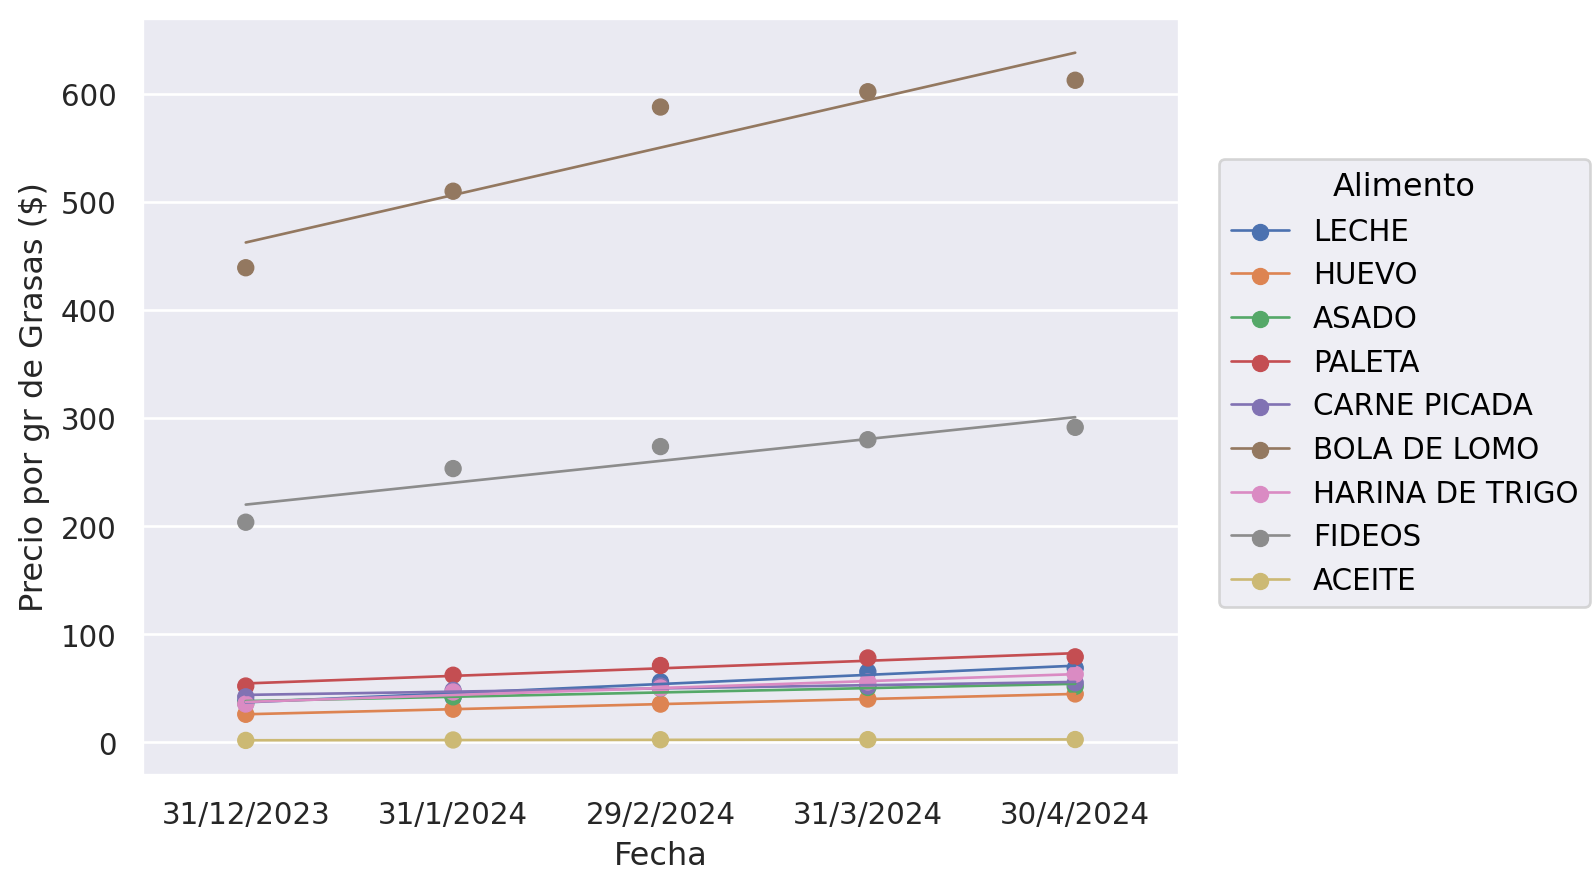

In [ ]:
so.Plot(data=Gr__Nutricional, x="Fecha", y="Precio por gr de Grasas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))

sin outliers

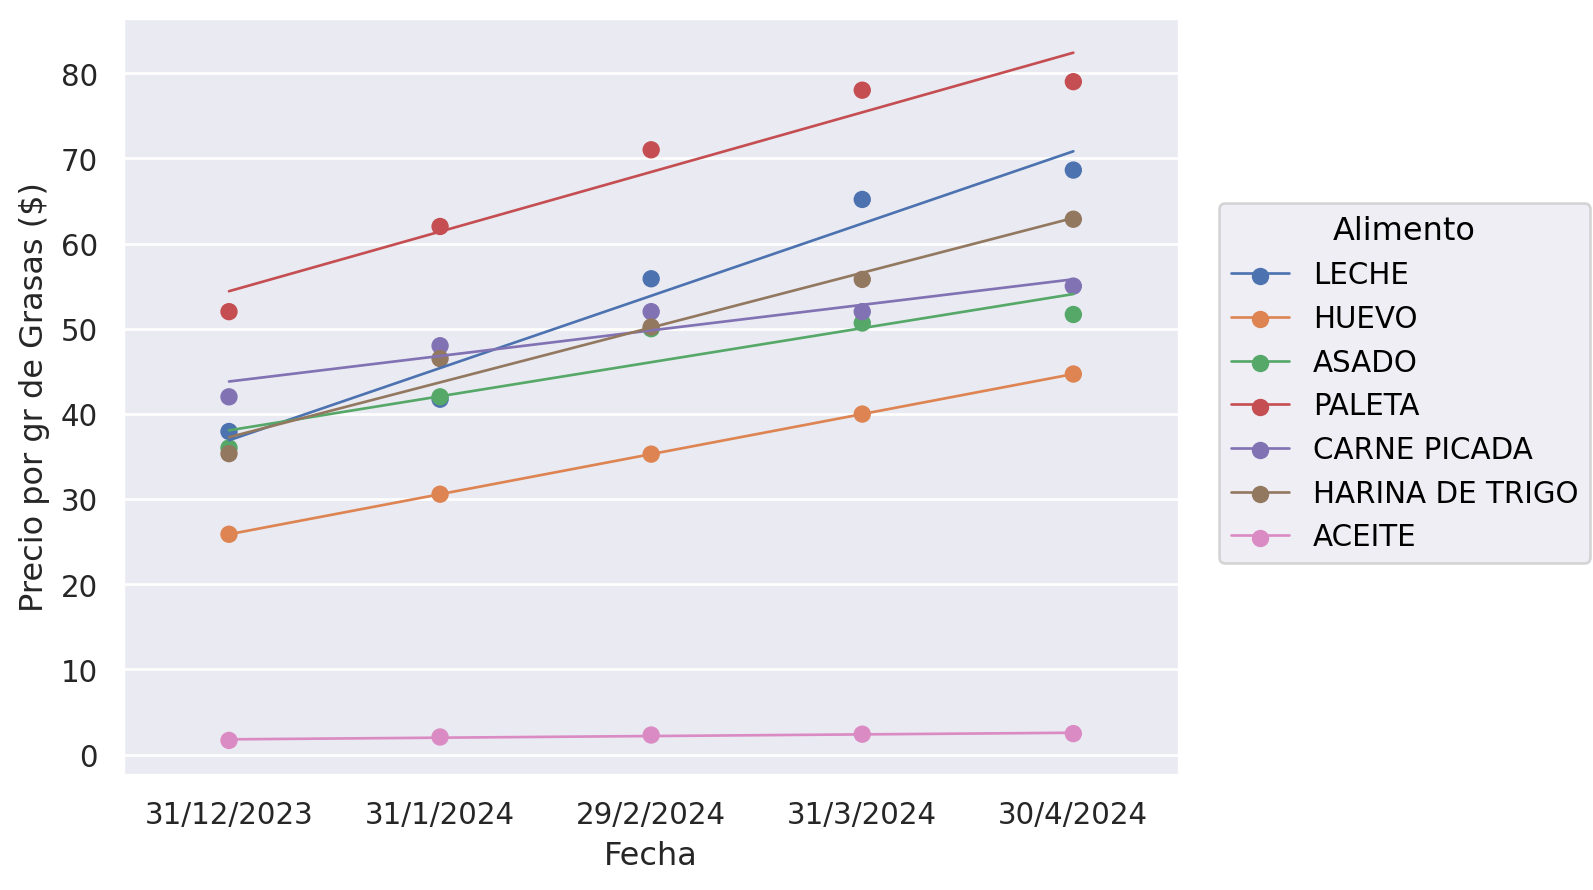

In [ ]:
so.Plot(data=Gr__Nutricional[Gr__Nutricional["Precio por gr de Grasas ($)"] < 200], x="Fecha", y="Precio por gr de Grasas ($)", color="Alimento").add(so.Dot()).add(so.Line(linewidth=1), so.PolyFit(1))


Precio por Gramo de Grasas

Si yo quiero tomar el de todos, que promedio tengo que hacer. Promediar primero Cantidad y precio despues dividirlos o hay alguna otra dehacerlo?

### Consigna 6

Preparar un consumidores libres solo con carne y otro con todo lo demas. HAcer estas funciones de nuevo y ver como queda y comparar

### Consigna 7

Aca vemos que necesitamos de toda la carne y vemos alimentos que tengan altos contenidos de lo que nos falta, de ahi comparamos con la tabla de sin y vemos que alimentos tienen la menor escala de aumento y las usamos para reemplazar la carne

### Consigna 8

No se a que se esta refiriendo asi que no puedo dar muchas opiniones al respecto